<div align="center">

# 🎓 TPE: analyse convex avec SymPy

## INF4127 - Optimisation 2

<br>

<table style="border: 2px solid #2c3e50; border-radius: 10px; padding: 20px; background: linear-gradient(135deg, #f8f9fa 0%, #e9ecef 100%); width: 80%; margin: 0 auto;">
  <tr>
    <td colspan="3" style="text-align: center; padding: 15px; background: #2c3e50; color: white; border-radius: 8px;">
      <strong>👥 ÉQUIPE DU PROJET</strong>
    </td>
  </tr>
  <tr style="background: #3498db; color: white;">
    <th style="padding: 12px; text-align: left;">Nom & Prénom</th>
    <th style="padding: 12px; text-align: center;">Matricule</th>
    <th style="padding: 12px; text-align: center;">Rôle</th>
  </tr>
  <tr style="background: #ffffff;">
    <td style="padding: 10px; border-bottom: 1px solid #ddd;">ESSUTHI MBANGUE ANGE ARMEL</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">24F2456</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Membre</td>
  </tr>
  <tr style="background: #f8f9fa;">
    <td style="padding: 10px; border-bottom: 1px solid #ddd;">TAGNE TALLA IDRISS CHANEL</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">19M2351</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Membre</td>
  </tr>
  <tr style="background: #ffffff;">
    <td style="padding: 10px; border-bottom: 1px solid #ddd;">DJATCHE NKAMGANG SYLVANO</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">22W2163</td>
    <td style="padding: 10px; border-bottom: 1px solid #ddd; text-align: center;">Membre</td>
  </tr>
  <tr style="background: #f8f9fa;">
    <td style="padding: 10px;">GOUJOU GUIMATSA ZIDANE</td>
    <td style="padding: 10px; text-align: center;">21T2899</td>
    <td style="padding: 10px; text-align: center;">Membre</td>
  </tr>
</table

</div>

# TP Optimisation II - INF4127
**Université de Yaoundé 1 / Département d'Informatique INF M1**
**Année académique 2025-2026**
**Fiche de TPE n°1**

## Exercice 1: Étude des fonctions de perte

### Objectifs du TP :
1. Calculer les gradients des fonctions de perte
2. Étudier leur convexité
3. Appliquer sur des jeux de données réels
4. Visualiser les résultats
5. Analyses statistiques et visualisations avancée

## 1. Importation des bibliothèques et configuration

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, Matrix, exp, log, Abs, Piecewise, simplify
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sp.init_printing()

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


## 2. Définition des symboles pour le calcul symbolique

In [9]:
# Définition des variables symboliques
x, y, theta0, theta1, theta2 = symbols('x y theta_0 theta_1 theta_2')
y_true, y_pred, p = symbols('y_true y_pred p', real=True)
delta, k = symbols('delta k', positive=True)
a, b = symbols('a b', positive=True)  # Pour l'ellipse
x0, y0 = symbols('x0 y0')  # Point sur l'ellipse

# Vecteurs pour les calculs
theta = Matrix([theta0, theta1])
X = Matrix([1, x])  # avec le biais

print("Variables symboliques définies:")
print(f"x = {x}, y = {y}, theta = {theta}")
print(f"delta = {delta}, a = {a}, b = {b}")

Variables symboliques définies:
x = x, y = y, theta = Matrix([[theta_0], [theta_1]])
delta = delta, a = a, b = b


# Partie 1: Expressions des gradients

## 1.1 Erreur Quadratique Moyenne (MSE)

### Définition mathématique
La fonction de perte MSE pour une prédiction \hat{y} et une cible y est définie comme :
L(\hat{y}) = \frac{1}{2} (y - \hat{y})^2
La constante \frac{1}{2} est souvent utilisée pour simplifier les dérivées.

In [13]:
# Définition symbolique de la MSE
mse_expr = (1/2) * (y_true - y_pred)**2
print("Expression de la MSE:")
mse_expr

Expression de la MSE:


### Calcul du gradient

In [16]:
# Gradient de la MSE
grad_mse_y_pred = diff(mse_expr, y_pred)
print("Gradient de la MSE par rapport à y_pred:")
grad_mse_y_pred

Gradient de la MSE par rapport à y_pred:


## 1.2 Entropie Croisée Binaire

### Définition mathématique
La fonction de perte BCE pour une probabilité prédite p (entre 0 et 1) et une cible binaire y (0 ou 1) est :
L(p) = - y \log p - (1 - y) \log (1 - p)

In [20]:
# Définition symbolique de l'entropie croisée binaire
bce_expr = - (y_true * log(p) + (1 - y_true) * log(1 - p))
print("Expression de l'entropie croisée binaire:")
bce_expr

Expression de l'entropie croisée binaire:


### Calcul du gradient

Gradient de l'entropie croisée binaire par rapport à p:


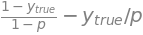

In [23]:
# Gradient de l'entropie croisée binaire
grad_bce_p = diff(bce_expr, p)
print("Gradient de l'entropie croisée binaire par rapport à p:")
grad_bce_p

## 1.3 Entropie Croisée Catégorielle

### Définition mathématique
Pour K classes, avec \mathbf{p} = (p_1, \dots, p_K) le vecteur de probabilités prédites et \mathbf{y} = (y_1, \dots, y_K) le vecteur one-hot :
L(\mathbf{p}) = - \sum_{k=1}^K y_k \log p_k

In [27]:
# Pour 2 classes pour simplifier
p1, p2 = symbols('p1 p2', positive=True)
y1, y2 = symbols('y1 y2', real=True)

# Contrainte: p1 + p2 = 1
cce_expr = - (y1 * log(p1) + y2 * log(p2))
print("Expression de l'entropie croisée catégorielle (2 classes):")
cce_expr

Expression de l'entropie croisée catégorielle (2 classes):


### Calcul du gradient

In [30]:
# Gradients pour les 2 classes
grad_cce_p1 = diff(cce_expr, p1)
grad_cce_p2 = diff(cce_expr, p2)

print("Gradients de l'entropie croisée catégorielle:")
print(f"dL/dp1 = {grad_cce_p1}")
print(f"dL/dp2 = {grad_cce_p2}")

Gradients de l'entropie croisée catégorielle:
dL/dp1 = -y1/p1
dL/dp2 = -y2/p2


## 1.4 Perte de Huber

### Définition mathématique
La perte de Huber pour une erreur \delta = y - \hat{y} et un paramètre k > 0 :
L(\delta) = 
\begin{cases} 
\frac{1}{2} \delta^2 & \text{si } |\delta| \leq k \
k |\delta| - \frac{1}{2} k^2 & \text{si } |\delta| > k 
\end{cases}

In [34]:
# Définition symbolique de la perte de Huber
residual = y_true - y_pred
huber_expr = Piecewise(
    (0.5 * residual**2, Abs(residual) <= k),
    (k * Abs(residual) - 0.5 * k**2, True)
)

print("Expression de la perte de Huber:")
huber_expr

Expression de la perte de Huber:


⎧                        2                              
⎪   0.5⋅(-y_pred + yₜᵣᵤₑ)       for k ≥ │y_pred - yₜᵣᵤₑ│
⎨                                                       
⎪       2                                               
⎩- 0.5⋅k  + k⋅│y_pred - yₜᵣᵤₑ│         otherwise        

### Calcul du gradient

In [37]:
# Gradient de la perte de Huber
grad_huber_y_pred = diff(huber_expr, y_pred)
print("Gradient de la perte de Huber:")
grad_huber_y_pred

Gradient de la perte de Huber:


⎧1.0⋅y_pred - 1.0⋅yₜᵣᵤₑ  for k ≥ │y_pred - yₜᵣᵤₑ│
⎨                                                
⎩k⋅sign(y_pred - yₜᵣᵤₑ)         otherwise        

# Partie 2: Étude de la convexité

## 2.1 Convexité de l'Erreur Quadratique Moyenne (MSE)

### Analyse mathématique

**Fonction :** L(\hat{y}) = \frac{1}{2} (y - \hat{y})^2

**Dérivée première :**
\frac{\partial L}{\partial \hat{y}} = - (y - \hat{y})

**Dérivée seconde (Hessienne) :**
\frac{\partial^2 L}{\partial \hat{y}^2} = 1

In [41]:
# Vérification symbolique
hessian_mse = diff(grad_mse_y_pred, y_pred)
print("Hessienne de la MSE:")
hessian_mse

Hessienne de la MSE:


**Conclusion :** La Hessienne est H = [[1]], qui est **positive définie** car 1 > 0. 

✅ **La MSE est strictement convexe** par rapport à \hat{y}.

## 2.2 Convexité de l'Entropie Croisée Binaire (BCE)

### Analyse mathématique

**Fonction :** L(p) = - y \log p - (1 - y) \log (1 - p)

**Dérivée première :**
\frac{\partial L}{\partial p} = -\frac{y}{p} + \frac{1 - y}{1 - p}

**Dérivée seconde :**
\frac{\partial^2 L}{\partial p^2} = \frac{y}{p^2} + \frac{1 - y}{(1 - p)^2}

Hessienne de l'entropie croisée binaire:


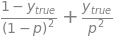

In [46]:
# Vérification symbolique
hessian_bce = diff(grad_bce_p, p)
print("Hessienne de l'entropie croisée binaire:")
hessian_bce

**Analyse :** 
- Pour y \in [0, 1] et p \in (0, 1), chaque terme est positif
- La seconde dérivée est **strictement positive** (> 0)

✅ **La BCE est strictement convexe** par rapport à p.

## 2.3 Convexité de l'Entropie Croisée Catégorielle (CCE)

### Analyse mathématique

**Fonction (2 classes) :** L(p_1, p_2) = - (y_1 \log p_1 + y_2 \log p_2)

**Matrice Hessienne :**
H = \begin{pmatrix}
\frac{y_1}{p_1^2} & 0 \
0 & \frac{y_2}{p_2^2}
\end{pmatrix}

In [51]:
# Calcul de la Hessienne pour CCE
hessian_cce_p1p1 = diff(grad_cce_p1, p1)
hessian_cce_p2p2 = diff(grad_cce_p2, p2)
hessian_cce_p1p2 = diff(grad_cce_p1, p2)

print("Éléments de la Hessienne pour CCE:")
print(f"∂²L/∂p1² = {hessian_cce_p1p1}")
print(f"∂²L/∂p2² = {hessian_cce_p2p2}")
print(f"∂²L/∂p1∂p2 = {hessian_cce_p1p2}")

Éléments de la Hessienne pour CCE:
∂²L/∂p1² = y1/p1**2
∂²L/∂p2² = y2/p2**2
∂²L/∂p1∂p2 = 0


**Analyse :**
- La Hessienne est **diagonale** avec des éléments \frac{y_k}{p_k^2} \geq 0
- Les valeurs propres sont donc \frac{y_1}{p_1^2} et \frac{y_2}{p_2^2} (≥ 0)
- La matrice est **semi-définie positive**

✅ **La CCE est convexe** par rapport à \mathbf{p} sur le simplexe.

## 2.4 Convexité de la Perte de Huber

### Analyse mathématique

**Fonction piecewise :**
L(\delta) = 
\begin{cases} 
\frac{1}{2} \delta^2 & \text{si } |\delta| \leq k \
k |\delta| - \frac{1}{2} k^2 & \text{si } |\delta| > k 
\end{cases}

**Dérivée seconde (où définie) :**
\frac{\partial^2 L}{\partial \delta^2} = 
\begin{cases} 
1 & \text{si } |\delta| < k \
0 & \text{si } |\delta| > k 
\end{cases}

In [56]:
# Analyse de convexité pour Huber
print("Analyse de convexité - Perte de Huber:")
print("• Région quadratique (|δ| ≤ k): Hessienne = 1 > 0 → Convexe")
print("• Région linéaire (|δ| > k): Hessienne = 0 → Linéaire (convexe)")
print("• La fonction est continue et piecewise convexe")
print("\n✅ La perte de Huber est convexe (mais pas strictement convexe)")

Analyse de convexité - Perte de Huber:
• Région quadratique (|δ| ≤ k): Hessienne = 1 > 0 → Convexe
• Région linéaire (|δ| > k): Hessienne = 0 → Linéaire (convexe)
• La fonction est continue et piecewise convexe

✅ La perte de Huber est convexe (mais pas strictement convexe)


## 2.5 Synthèse des propriétés de convexité

In [59]:
# Tableau récapitulatif
print("TABLEAU RÉCAPITULATIF - PROPRIÉTÉS DE CONVEXITÉ")
print("=" * 80)
print(f"{'Fonction de perte':<30} {'Convexité':<15} {'Stricte':<10} {'Hessienne':<20}")
print("-" * 80)
print(f"{'MSE':<30} {'OUI':<15} {'OUI':<10} {'1 > 0':<20}")
print(f"{'Entropie Croisée Binaire':<30} {'OUI':<15} {'OUI':<10} {'y/p² + (1-y)/(1-p)² > 0':<20}")
print(f"{'Entropie Croisée Catégorielle':<30} {'OUI':<15} {'NON*':<10} {'Diagonale ≥ 0':<20}")
print(f"{'Perte de Huber':<30} {'OUI':<15} {'NON':<10} {'1 ou 0 ≥ 0':<20}")
print("=" * 80)
print("\n* Strictement convexe si tous les y_k > 0")

TABLEAU RÉCAPITULATIF - PROPRIÉTÉS DE CONVEXITÉ
Fonction de perte              Convexité       Stricte    Hessienne           
--------------------------------------------------------------------------------
MSE                            OUI             OUI        1 > 0               
Entropie Croisée Binaire       OUI             OUI        y/p² + (1-y)/(1-p)² > 0
Entropie Croisée Catégorielle  OUI             NON*       Diagonale ≥ 0       
Perte de Huber                 OUI             NON        1 ou 0 ≥ 0          

* Strictement convexe si tous les y_k > 0


# Partie 3: Applications sur jeux de données

## 3.1 Jeu de données pour la régression

In [62]:
# Génération d'un jeu de données réaliste pour la régression
np.random.seed(42)
n_samples = 100

# Données avec relation linéaire + bruit
X_reg = np.random.randn(n_samples, 2)
true_theta = np.array([2.5, -1.8])
y_reg = X_reg @ true_theta + np.random.randn(n_samples) * 0.5

print("📊 Jeu de données pour la RÉGRESSION:")
print(f"Forme de X: {X_reg.shape}")
print(f"Forme de y: {y_reg.shape}")
print(f"Vraies paramètres: θ = {true_theta}")
print(f"\nStatistiques de X:")
print(f"  Moyenne: {X_reg.mean():.3f}, Écart-type: {X_reg.std():.3f}")
print(f"Statistiques de y: Moyenne: {y_reg.mean():.3f}, Écart-type: {y_reg.std():.3f}")

📊 Jeu de données pour la RÉGRESSION:
Forme de X: (100, 2)
Forme de y: (100,)
Vraies paramètres: θ = [ 2.5 -1.8]

Statistiques de X:
  Moyenne: -0.041, Écart-type: 0.929
Statistiques de y: Moyenne: -0.318, Écart-type: 2.901


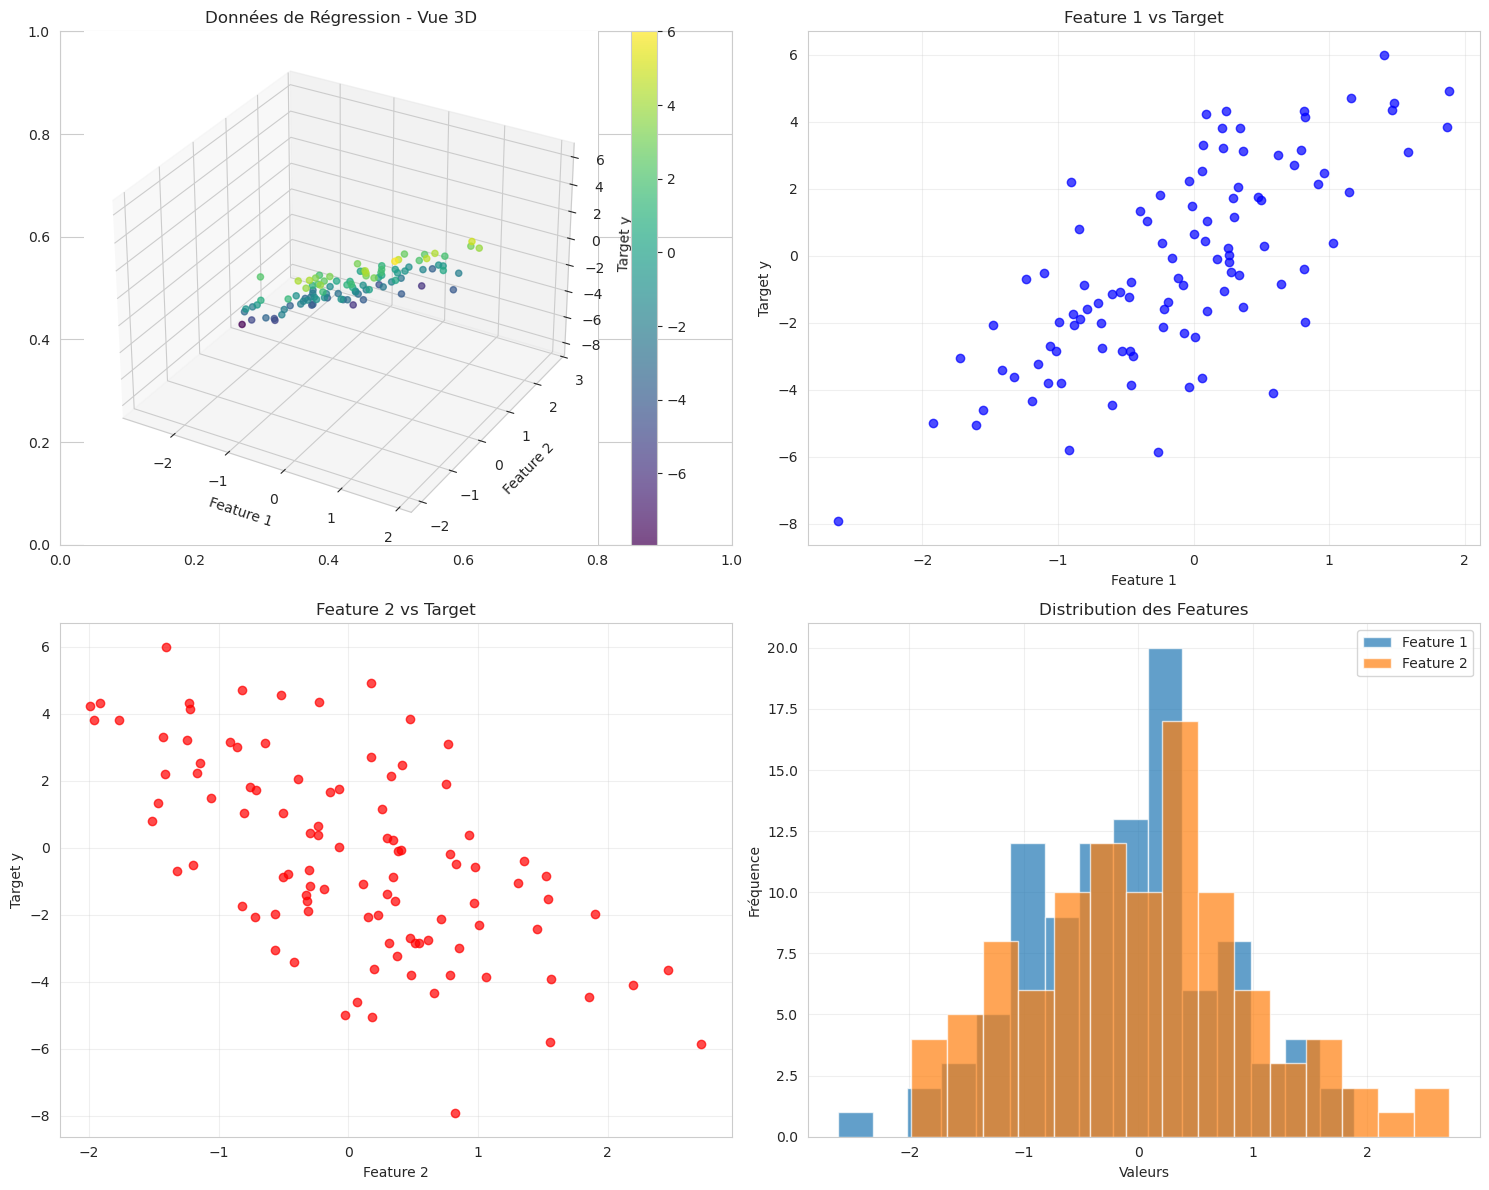

In [64]:
# Visualisation détaillée des données de régression
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Nuage de points 3D
ax = fig.add_subplot(2, 2, 1, projection='3d')
scatter = ax.scatter(X_reg[:, 0], X_reg[:, 1], y_reg, c=y_reg, cmap='viridis', alpha=0.7)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target y')
ax.set_title('Données de Régression - Vue 3D')
plt.colorbar(scatter, ax=ax)

# Graphique 2: Feature 1 vs Target
axes[0, 1].scatter(X_reg[:, 0], y_reg, alpha=0.7, color='blue')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Target y')
axes[0, 1].set_title('Feature 1 vs Target')
axes[0, 1].grid(True, alpha=0.3)

# Graphique 3: Feature 2 vs Target
axes[1, 0].scatter(X_reg[:, 1], y_reg, alpha=0.7, color='red')
axes[1, 0].set_xlabel('Feature 2')
axes[1, 0].set_ylabel('Target y')
axes[1, 0].set_title('Feature 2 vs Target')
axes[1, 0].grid(True, alpha=0.3)

# Graphique 4: Distribution des features
axes[1, 1].hist(X_reg[:, 0], alpha=0.7, label='Feature 1', bins=15)
axes[1, 1].hist(X_reg[:, 1], alpha=0.7, label='Feature 2', bins=15)
axes[1, 1].set_xlabel('Valeurs')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].set_title('Distribution des Features')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.2 Jeu de données pour la classification

In [67]:
# Chargement du dataset Iris (2 classes pour la classification binaire)
iris = load_iris()
X_iris = iris.data[:100, :2]  # Premières 100 observations, 2 features
y_iris = iris.target[:100]    # Deux classes

# Alternative: génération de données synthétiques
X_clf, y_clf = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                   n_informative=2, n_clusters_per_class=1,
                                   random_state=42)

print("📊 Jeu de données pour la CLASSIFICATION:")
print(f"Forme de X: {X_clf.shape}")
print(f"Forme de y: {y_clf.shape}")
print(f"Distribution des classes: {np.unique(y_clf, return_counts=True)}")
print(f"\nExemple des données:")
print(f"X[:5] = \n{X_clf[:5]}")
print(f"y[:5] = {y_clf[:5]}")

📊 Jeu de données pour la CLASSIFICATION:
Forme de X: (100, 2)
Forme de y: (100,)
Distribution des classes: (array([0, 1]), array([50, 50]))

Exemple des données:
X[:5] = 
[[ 1.22831184 -0.75717844]
 [ 0.69840909 -1.38029525]
 [ 2.54881729  2.50225822]
 [ 0.57357881 -1.35297943]
 [ 0.58590018 -1.33745666]]
y[:5] = [0 0 1 0 0]


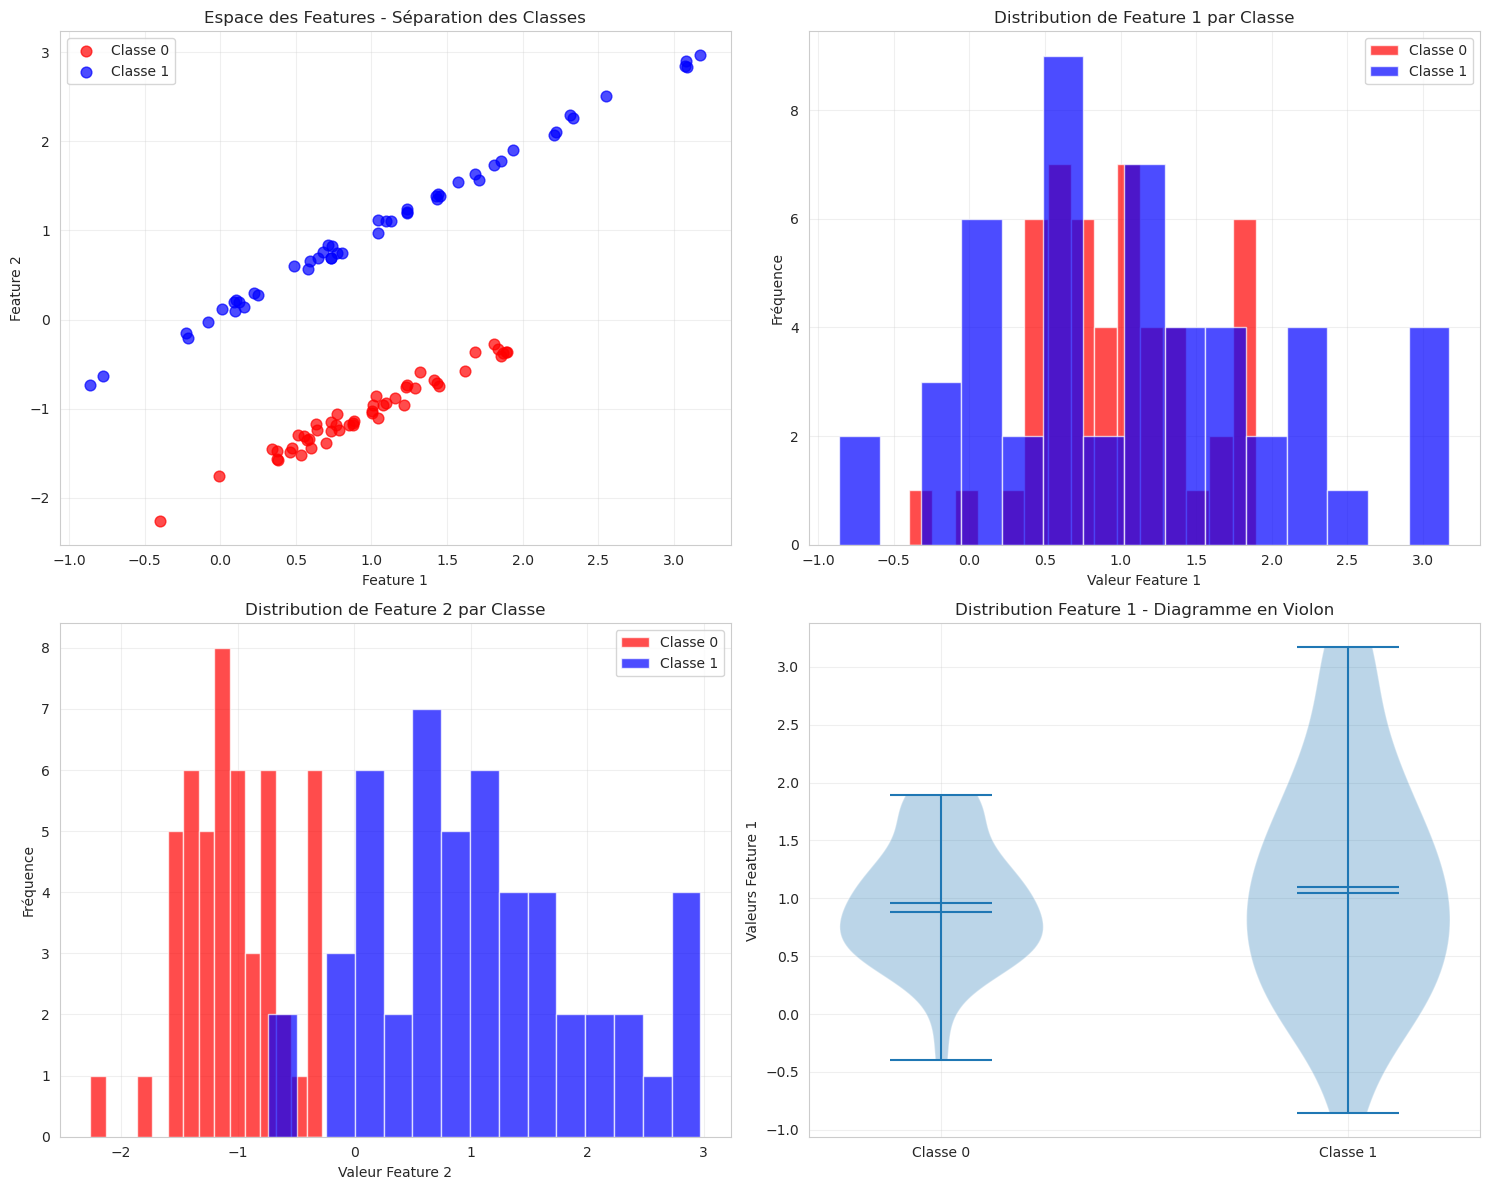

In [69]:
# Visualisation détaillée des données de classification
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Nuage de points avec séparation
scatter = axes[0, 0].scatter(X_clf[y_clf == 0, 0], X_clf[y_clf == 0, 1], 
                            c='red', label='Classe 0', alpha=0.7, s=60)
scatter = axes[0, 0].scatter(X_clf[y_clf == 1, 0], X_clf[y_clf == 1, 1], 
                            c='blue', label='Classe 1', alpha=0.7, s=60)
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].set_title('Espace des Features - Séparation des Classes')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Graphique 2: Distribution de Feature 1 par classe
axes[0, 1].hist(X_clf[y_clf == 0, 0], alpha=0.7, label='Classe 0', color='red', bins=15)
axes[0, 1].hist(X_clf[y_clf == 1, 0], alpha=0.7, label='Classe 1', color='blue', bins=15)
axes[0, 1].set_xlabel('Valeur Feature 1')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].set_title('Distribution de Feature 1 par Classe')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Graphique 3: Distribution de Feature 2 par classe
axes[1, 0].hist(X_clf[y_clf == 0, 1], alpha=0.7, label='Classe 0', color='red', bins=15)
axes[1, 0].hist(X_clf[y_clf == 1, 1], alpha=0.7, label='Classe 1', color='blue', bins=15)
axes[1, 0].set_xlabel('Valeur Feature 2')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution de Feature 2 par Classe')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Graphique 4: Diagramme en violon
violin_parts = axes[1, 1].violinplot([X_clf[y_clf == 0, 0], X_clf[y_clf == 1, 0]], 
                                   showmeans=True, showmedians=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Classe 0', 'Classe 1'])
axes[1, 1].set_ylabel('Valeurs Feature 1')
axes[1, 1].set_title('Distribution Feature 1 - Diagramme en Violon')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Partie 4: Visualisation des fonctions de perte

## 4.1 Implémentation numérique des fonctions de perte

In [109]:
# Implémentation numérique complète des fonctions de perte
class LossFunctions:
    @staticmethod
    def mse(y_true, y_pred):
        """Erreur Quadratique Moyenne"""
        return 0.5 * np.mean((y_true - y_pred)**2)
    
    @staticmethod
    def bce(y_true, y_pred):
        """Entropie Croisée Binaire"""
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    @staticmethod
    def huber(y_true, y_pred, delta=1.0):
        """Perte de Huber"""
        residual = np.abs(y_true - y_pred)
        condition = residual <= delta
        squared_loss = 0.5 * residual**2
        linear_loss = delta * residual - 0.5 * delta**2
        return np.mean(np.where(condition, squared_loss, linear_loss))
    
    @staticmethod
    def compute_loss_surface(loss_func, theta0_range, theta1_range, X, y):
        """Calcule la surface de perte pour différentes valeurs de theta"""
        loss = np.zeros((len(theta0_range), len(theta1_range)))
        for i, t0 in enumerate(theta0_range):
            for j, t1 in enumerate(theta1_range):
                if loss_func == LossFunctions.bce:
                    # Pour la classification: transformation sigmoïde
                    z = t0 * X[:, 0] + t1 * X[:, 1]
                    y_pred = 1 / (1 + np.exp(-z))
                else:
                    # Pour la régression: prédiction linéaire
                    y_pred = t0 * X[:, 0] + t1 * X[:, 1]
                loss[i, j] = loss_func(y, y_pred)
        return loss

print(" Fonctions de perte implémentées")

 Fonctions de perte implémentées


## 4.2 Visualisation des surfaces de perte pour la régression (MSE)

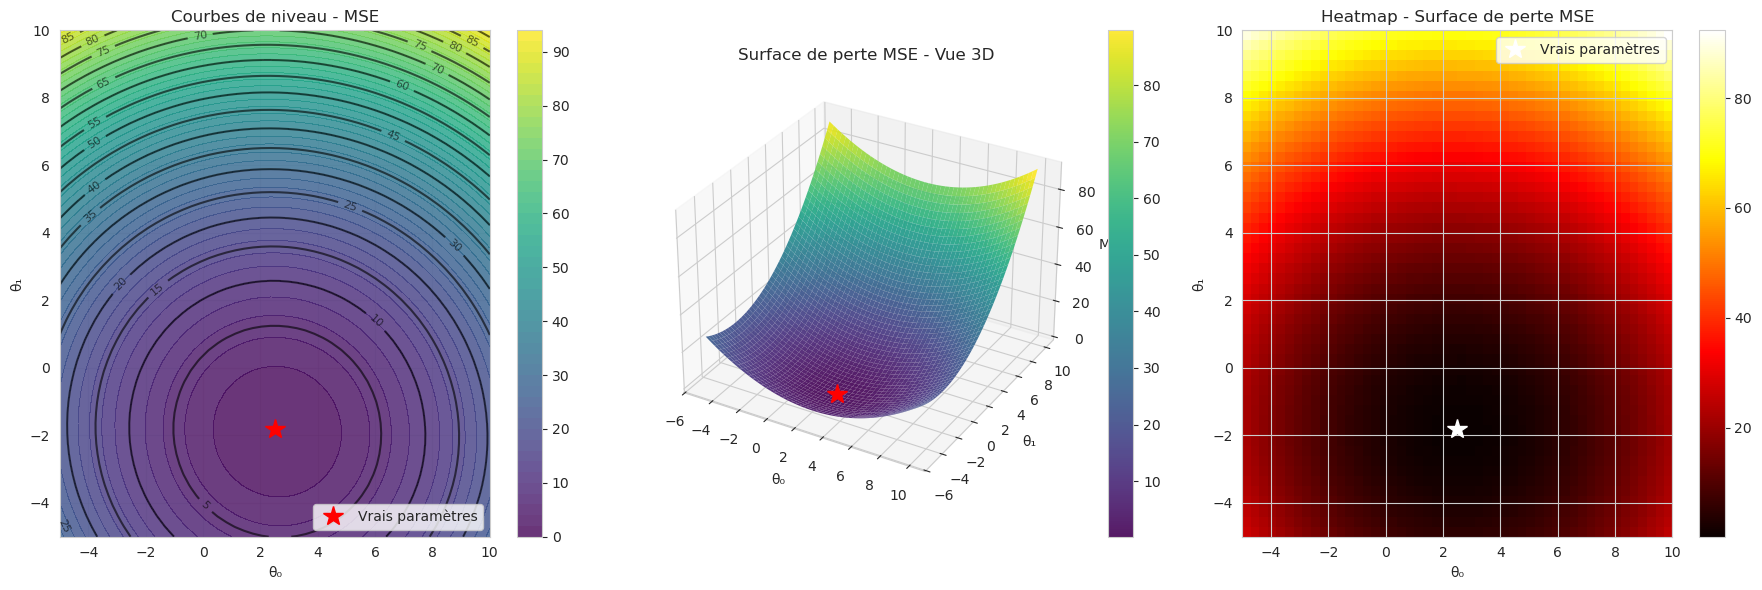

 Observation: La surface MSE montre une forme convexe parfaite avec un minimum global unique


In [111]:
# Calcul de la surface de perte MSE
theta0_range = np.linspace(-5, 10, 50)
theta1_range = np.linspace(-5, 10, 50)

mse_loss_surface = LossFunctions.compute_loss_surface(
    LossFunctions.mse, theta0_range, theta1_range, X_reg, y_reg
)

# Visualisation complète
fig = plt.figure(figsize=(18, 6))

# Graphique 1: Courbes de niveau
plt.subplot(131)
contour = plt.contour(theta0_range, theta1_range, mse_loss_surface.T, levels=20, colors='black', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
contourf = plt.contourf(theta0_range, theta1_range, mse_loss_surface.T, levels=50, cmap='viridis', alpha=0.8)
plt.plot(true_theta[0], true_theta[1], 'r*', markersize=15, label='Vrais paramètres')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Courbes de niveau - MSE')
plt.colorbar(contourf)
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 2: Surface 3D
ax = fig.add_subplot(132, projection='3d')
T0, T1 = np.meshgrid(theta0_range, theta1_range)
surf = ax.plot_surface(T0, T1, mse_loss_surface.T, cmap='viridis', alpha=0.9, linewidth=0)
ax.plot([true_theta[0]], [true_theta[1]], [mse_loss_surface.min()], 'r*', markersize=15, label='Minimum')
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('MSE')
ax.set_title('Surface de perte MSE - Vue 3D')
plt.colorbar(surf)

# Graphique 3: Heatmap
plt.subplot(133)
im = plt.imshow(mse_loss_surface.T, extent=[-5, 10, -5, 10], origin='lower', cmap='hot', aspect='auto')
plt.plot(true_theta[0], true_theta[1], 'w*', markersize=15, label='Vrais paramètres')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Heatmap - Surface de perte MSE')
plt.colorbar(im)
plt.legend()

plt.tight_layout()
plt.show()

print(" Observation: La surface MSE montre une forme convexe parfaite avec un minimum global unique")

## 4.3 Visualisation des surfaces de perte pour la classification (BCE)

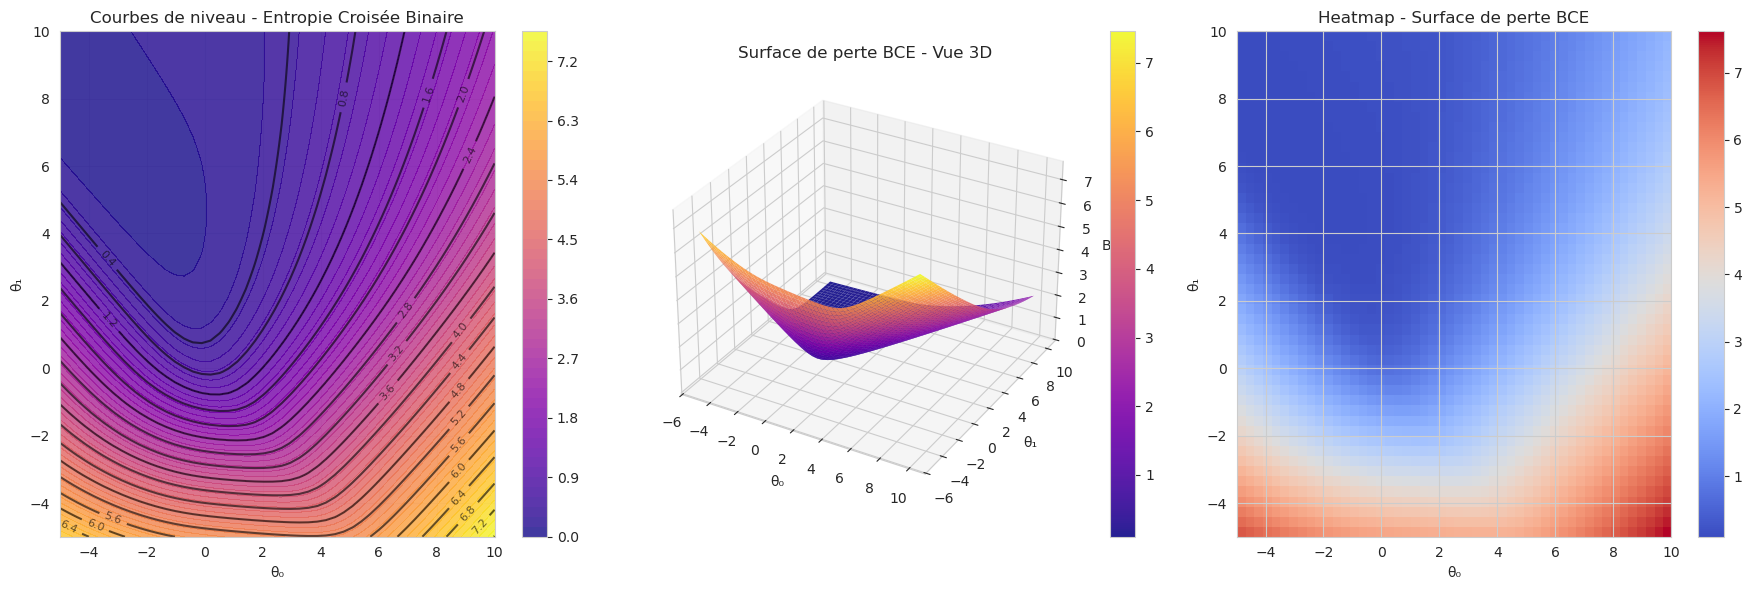

🔍 Observation: La surface BCE est également convexe mais avec une forme différente due à la transformation sigmoïde


In [78]:
# Calcul de la surface de perte BCE
bce_loss_surface = LossFunctions.compute_loss_surface(
    LossFunctions.bce, theta0_range, theta1_range, X_clf, y_clf
)

# Visualisation complète
fig = plt.figure(figsize=(18, 6))

# Graphique 1: Courbes de niveau
plt.subplot(131)
contour = plt.contour(theta0_range, theta1_range, bce_loss_surface.T, levels=20, colors='black', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
contourf = plt.contourf(theta0_range, theta1_range, bce_loss_surface.T, levels=50, cmap='plasma', alpha=0.8)
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Courbes de niveau - Entropie Croisée Binaire')
plt.colorbar(contourf)
plt.grid(True, alpha=0.3)

# Graphique 2: Surface 3D
ax = fig.add_subplot(132, projection='3d')
surf = ax.plot_surface(T0, T1, bce_loss_surface.T, cmap='plasma', alpha=0.9, linewidth=0)
ax.set_xlabel('θ₀')
ax.set_ylabel('θ₁')
ax.set_zlabel('BCE')
ax.set_title('Surface de perte BCE - Vue 3D')
plt.colorbar(surf)

# Graphique 3: Heatmap
plt.subplot(133)
im = plt.imshow(bce_loss_surface.T, extent=[-5, 10, -5, 10], origin='lower', cmap='coolwarm', aspect='auto')
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Heatmap - Surface de perte BCE')
plt.colorbar(im)

plt.tight_layout()
plt.show()

print("🔍 Observation: La surface BCE est également convexe mais avec une forme différente due à la transformation sigmoïde")

# Partie 5: Équation de la tangente à l'ellipse

## 5.1 Définition mathématique et calcul symbolique

### Équation de l'ellipse
L'équation standard d'une ellipse centrée à l'origine est :
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1

### Méthode de calcul de la tangente
Pour trouver l'équation de la tangente au point (x_0, y_0) sur l'ellipse :
1. Différenciation implicite de l'équation de l'ellipse
2. Résolution pour \frac{dy}{dx}
3. Utilisation de la forme point-pente pour l'équation de la tangente

Équation de l'ellipse:
 2    2
y    x 
── + ──
 2    2
b    a 
Dérivée dy/dx (pente de la tangente):


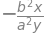

In [82]:
# Équation de l'ellipse
ellipse_eq = x**2/a**2 + y**2/b**2 - 1

# Dérivée implicite
dy_dx = - diff(ellipse_eq, x) / diff(ellipse_eq, y)

# Simplification
dy_dx_simplified = simplify(dy_dx)

print("Équation de l'ellipse:")
sp.pprint(ellipse_eq + 1)  # Pour montrer x²/a² + y²/b² = 1

print("Dérivée dy/dx (pente de la tangente):")
dy_dx_simplified

### Équation de la tangente
La pente au point (x_0, y_0) est :
m = -\frac{b^2 x_0}{a^2 y_0}

L'équation de la tangente est donc :
y - y_0 = m (x - x_0)

Équation de la tangente à l'ellipse au point (x₀, y₀):
y - y₀ = m(x - x₀)
où m = -b**2*x0/(a**2*y0)

Équation complète:


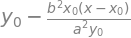

In [85]:
# Équation de la tangente
pente_tangente = dy_dx_simplified.subs({x: x0, y: y0})
tangente_eq = pente_tangente * (x - x0) + y0

print("Équation de la tangente à l'ellipse au point (x₀, y₀):")
print(f"y - y₀ = m(x - x₀)")
print(f"où m = {pente_tangente}")
print(f"\nÉquation complète:")
tangente_eq

## 5.2 Application numérique et visualisation

In [88]:
# Paramètres numériques
a_val, b_val = 3, 2  # Demi-axes de l'ellipse
x0_val = 2.0
y0_val = b_val * np.sqrt(1 - (x0_val/a_val)**2)  # Point sur l'ellipse

# Calcul numérique de la pente
pente_num = float(pente_tangente.subs({a: a_val, b: b_val, x0: x0_val, y0: y0_val}))

print("📐 APPLICATION NUMÉRIQUE")
print("=" * 50)
print(f"Paramètres de l'ellipse: a = {a_val}, b = {b_val}")
print(f"Point de tangence: ({x0_val:.2f}, {y0_val:.2f})")
print(f"Pente de la tangente: m = {pente_num:.4f}")
print(f"\nÉquation de la tangente:")
print(f"y - {y0_val:.2f} = {pente_num:.4f}(x - {x0_val:.2f})")
print(f"Soit: y = {pente_num:.4f}x + {y0_val - pente_num*x0_val:.4f}")

📐 APPLICATION NUMÉRIQUE
Paramètres de l'ellipse: a = 3, b = 2
Point de tangence: (2.00, 1.49)
Pente de la tangente: m = -0.5963

Équation de la tangente:
y - 1.49 = -0.5963(x - 2.00)
Soit: y = -0.5963x + 2.6833


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


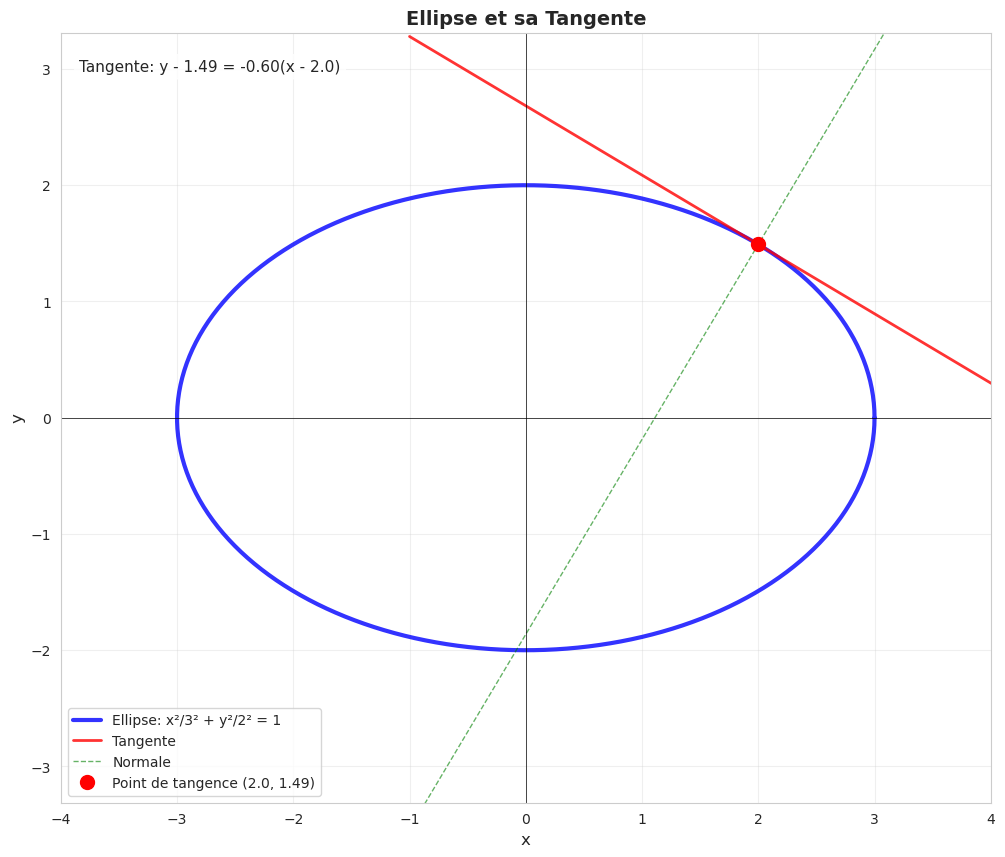

In [90]:
# Visualisation détaillée de l'ellipse et de sa tangente
theta_ellipse = np.linspace(0, 2*np.pi, 200)
x_ellipse = a_val * np.cos(theta_ellipse)
y_ellipse = b_val * np.sin(theta_ellipse)

# Points pour la tangente
x_tangent = np.linspace(x0_val - 3, x0_val + 3, 100)
y_tangent = pente_num * (x_tangent - x0_val) + y0_val

# Points pour la normale (perpendiculaire à la tangente)
pente_normale = -1 / pente_num if pente_num != 0 else float('inf')
y_normale = pente_normale * (x_tangent - x0_val) + y0_val

plt.figure(figsize=(12, 10))

# Ellipse
plt.plot(x_ellipse, y_ellipse, 'b-', linewidth=3, label=f'Ellipse: x²/{a_val}² + y²/{b_val}² = 1', alpha=0.8)

# Tangente
plt.plot(x_tangent, y_tangent, 'r-', linewidth=2, label='Tangente', alpha=0.8)

# Normale
plt.plot(x_tangent, y_normale, 'g--', linewidth=1, label='Normale', alpha=0.6)

# Point de tangence
plt.plot(x0_val, y0_val, 'ro', markersize=10, label=f'Point de tangence ({x0_val:.1f}, {y0_val:.2f})')

# Axes et grille
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Ellipse et sa Tangente', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)

# Annotation de l'équation
eq_text = f'Tangente: y - {y0_val:.2f} = {pente_num:.2f}(x - {x0_val:.1f})'
plt.annotate(eq_text, xy=(0.02, 0.95), xycoords='axes fraction', 
             fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.show()